## import required libraries

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

## Import Training and testing dataset

In [122]:
train_data = pd.read_csv('train.csv') 

## perform operations on training dataset

In [123]:
#check head entry
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [124]:
test_data = pd.read_csv('test.csv')

In [125]:
#check columns in train dataset

test_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [126]:
#check shape of training dataset
print('Shape of Train data is :', train_data.shape )

Shape of Train data is : (1460, 81)


## Analyse saleprice

In [127]:
#describe SalePrice
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

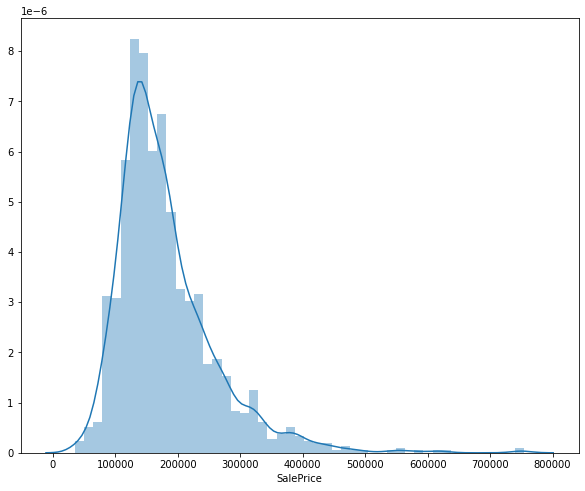

In [128]:
#plot distplot of Saleprice
plt.figure(figsize=(10,8))
sns.distplot(train_data['SalePrice'])

In [129]:
#find #skewness and kurtosis
print("Skewness: %f" % train_data['SalePrice'].skew())
print("Kurtosis: %f" % train_data['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


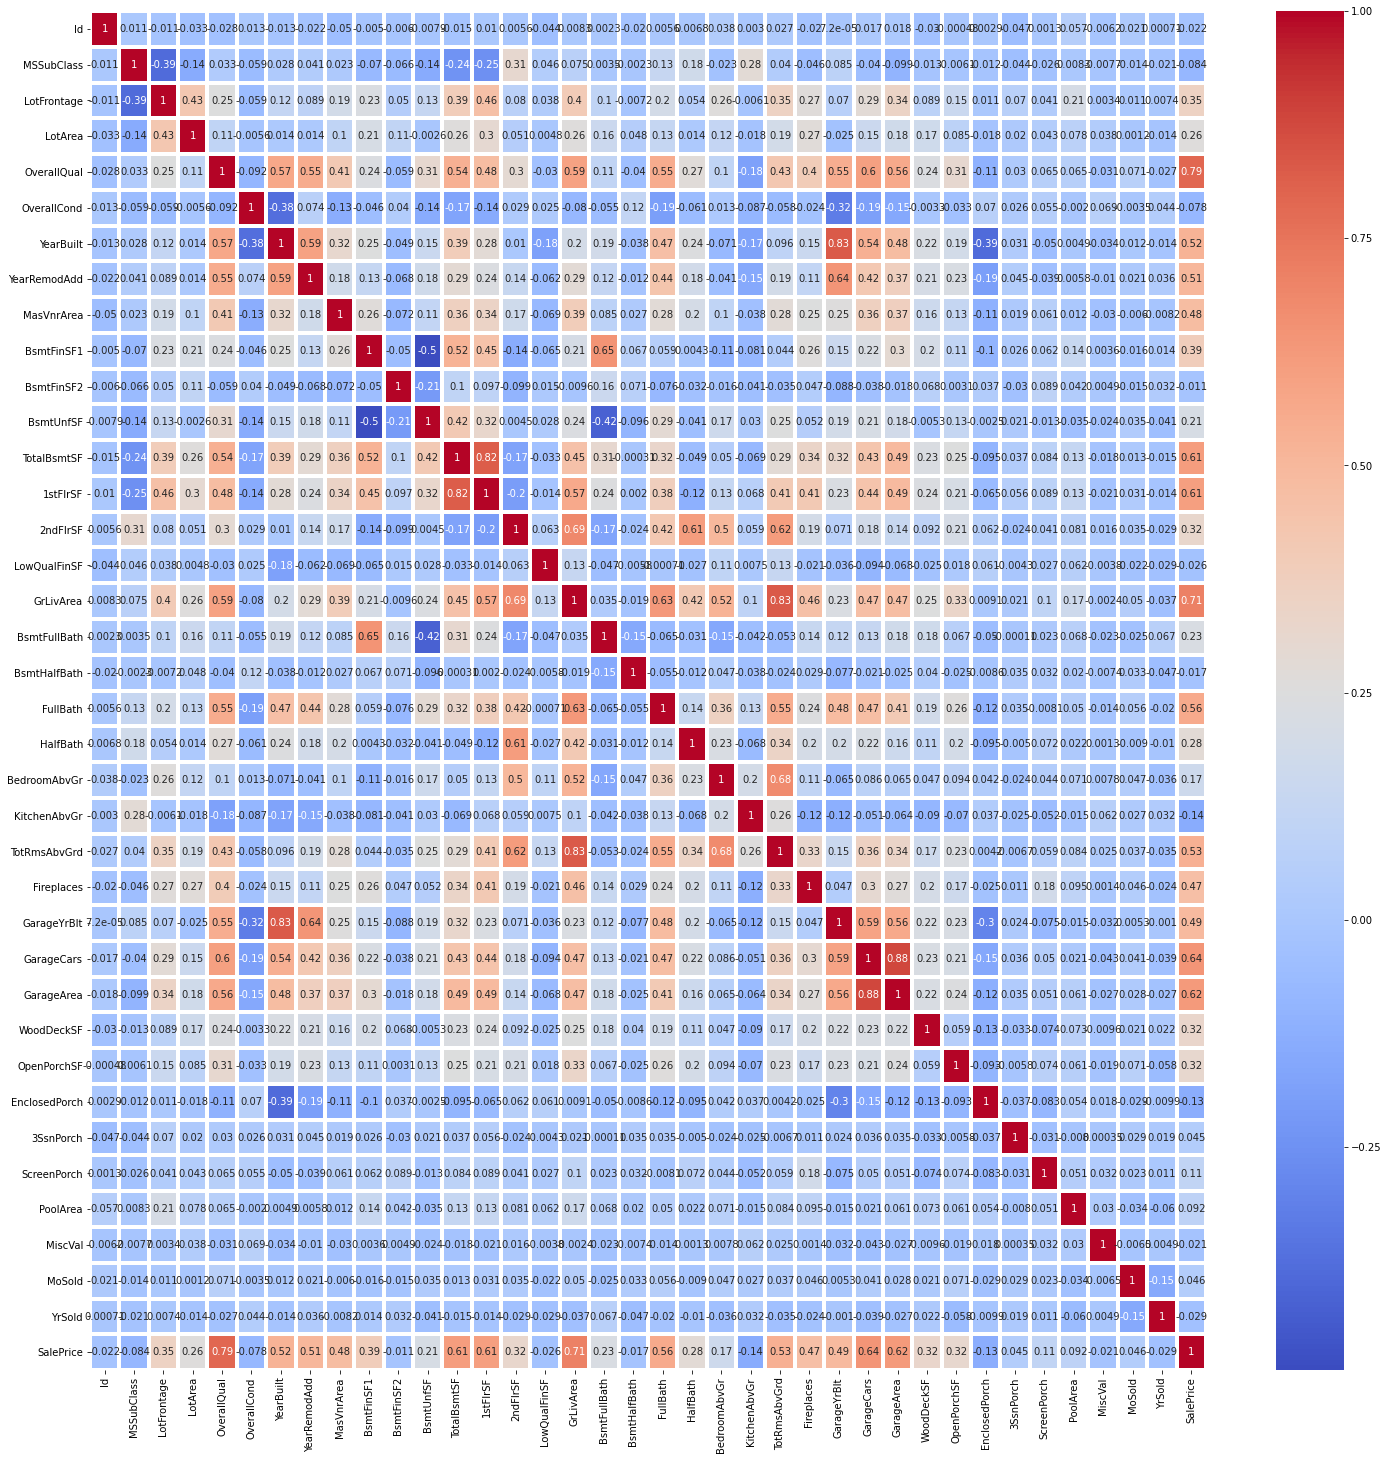

In [130]:
# here we check correlation between each point 
Cor = train_data.corr()
plt.figure(figsize=(25,25))
ax = sns.heatmap(Cor,cmap="coolwarm",annot=True,linewidths=3)

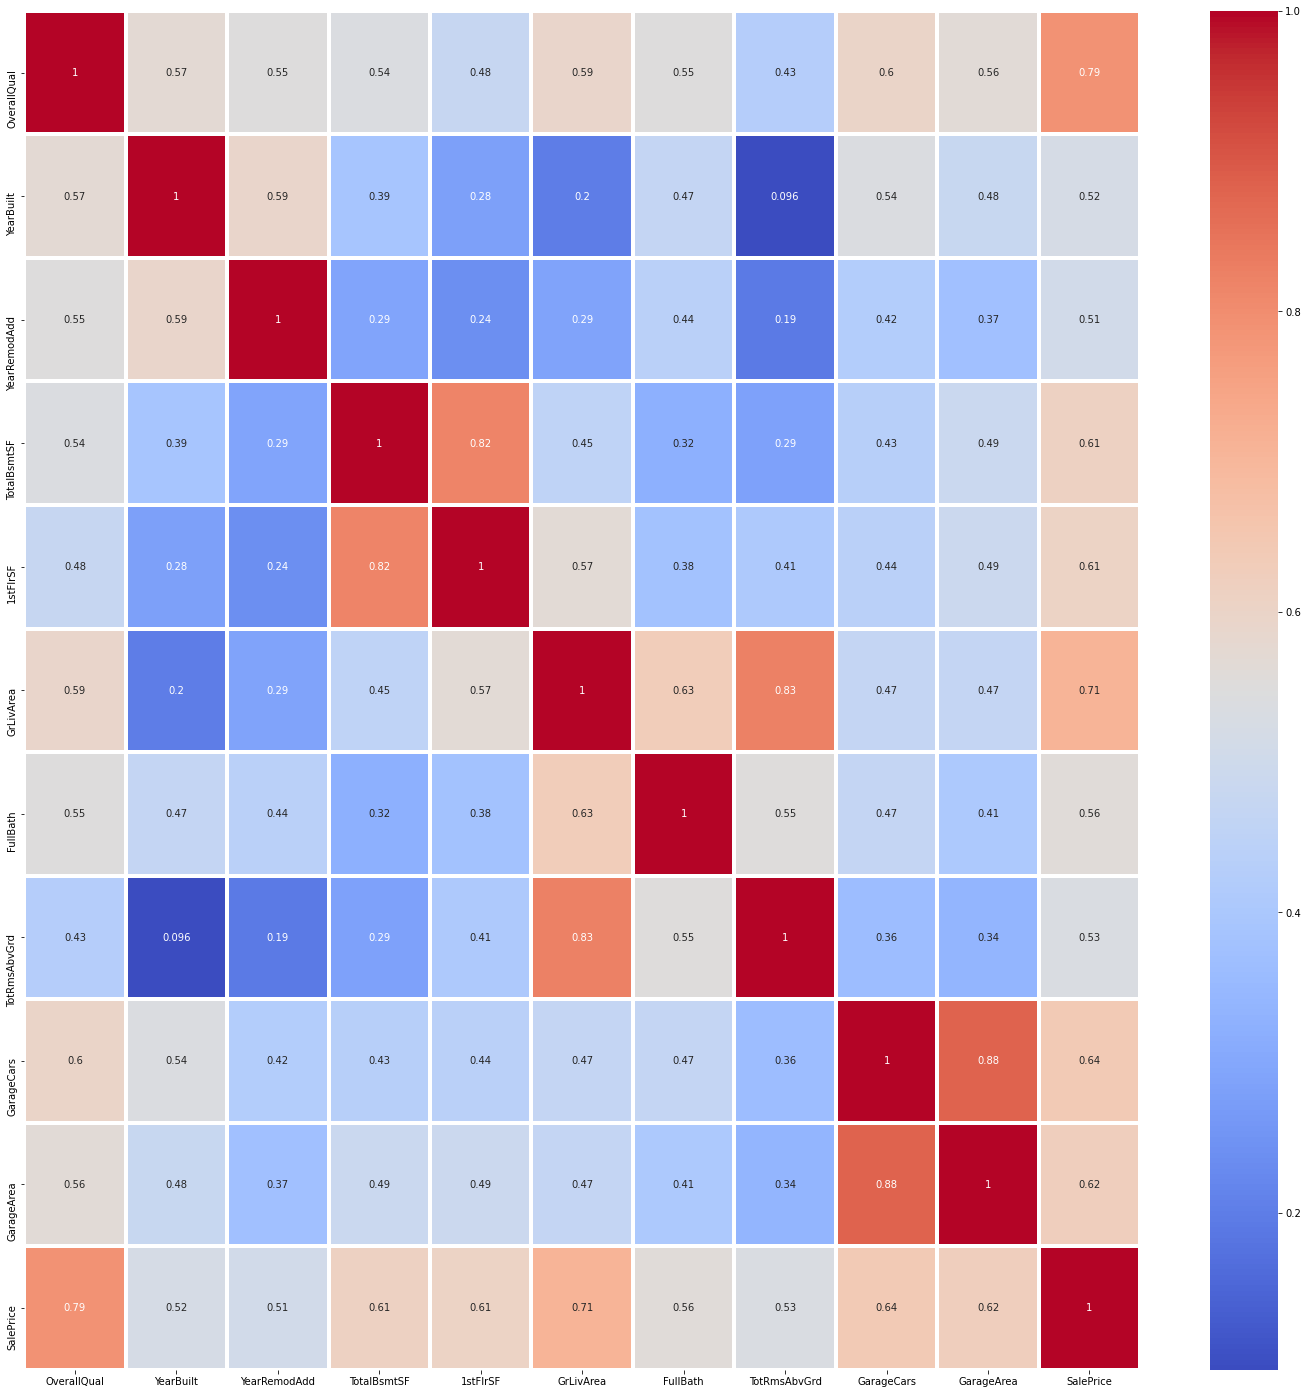

In [131]:
# now choose those columns which having correlation is > 0.5 (strong correlation with saleprice)
Cor_feature = Cor.index[abs(Cor['SalePrice']) >= 0.5]
Cor2 = train_data[Cor_feature].corr()

#here we check correlation between each point 
plt.figure(figsize=(25,25))
ax = sns.heatmap(Cor2,cmap="coolwarm",annot=True,linewidths=3)

## Handling Missing Data

In [132]:
#find total missing values as a count and percent too
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)

In [133]:
# now concat this and show top 20 rows
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


We'll consider that when more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed.

In [134]:
#dealing with missing data
train_data = train_data.drop((missing_data[missing_data['Total'] > 1]).index,1)
train_data = train_data.drop(train_data.loc[train_data['Electrical'].isnull()].index)

In [135]:
train_data.isnull().sum().max()

0

In [136]:
# apply SND
from sklearn.preprocessing import StandardScaler
Scalar = StandardScaler()
Scalar.fit(train_data[['SalePrice']])
train_data['SalePrice'] = Scalar.transform(train_data[['SalePrice']])

In [137]:
train_data['SalePrice']

0       0.347042
1       0.007170
2       0.535860
3      -0.515225
4       0.869437
          ...   
1455   -0.074651
1456    0.365924
1457    1.077137
1458   -0.488476
1459   -0.420817
Name: SalePrice, Length: 1459, dtype: float64

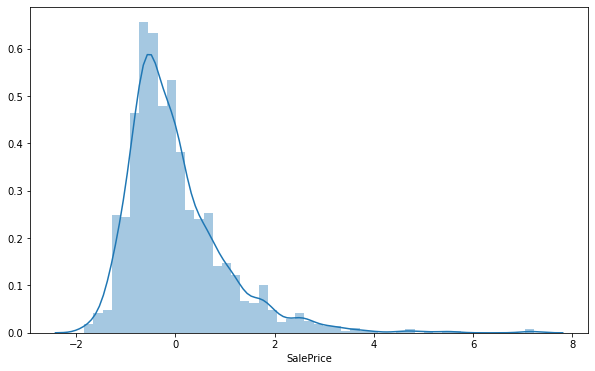

In [138]:
#plot distplot of Saleprice
plt.figure(figsize=(10,6))
sns.distplot(train_data['SalePrice'])

In [139]:
#applying log transformation
train_data['SalePrice'] = np.log(train_data['SalePrice'])

In [140]:
train_data['SalePrice']

0      -1.058310
1      -4.937836
2      -0.623883
3            NaN
4      -0.139909
          ...   
1455         NaN
1456   -1.005331
1457    0.074306
1458         NaN
1459         NaN
Name: SalePrice, Length: 1459, dtype: float64

In [141]:
train_data['SalePrice'].isnull().sum()

899

In [142]:
train_data['SalePrice'] = train_data['SalePrice'].fillna(train_data['SalePrice'].mean())

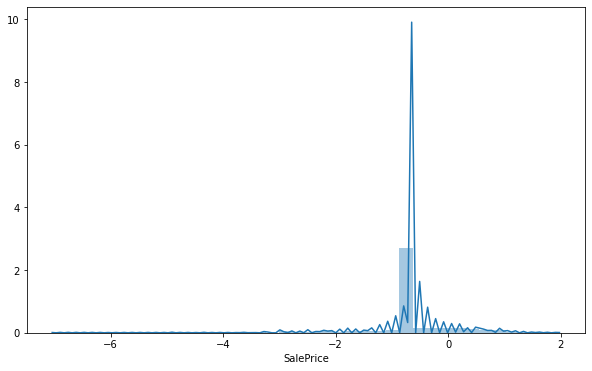

In [143]:
#plot distplot of Saleprice
plt.figure(figsize=(10,6))
sns.distplot(train_data['SalePrice'])

In [144]:
train_data.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,-1.058310
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,-4.937836
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,-0.623883
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,-0.666837
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,-0.139909


In [145]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [146]:
pd.set_option('display.max_rows',100)
train_data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageCars       0
GarageArea       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF 

In [147]:
pd.set_option('display.max_rows',100)
test_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

## Operation on Test dataset

In [148]:
test_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [149]:
#check shape of training dataset
print('Shape of Test data is :', test_data.shape )

Shape of Test data is : (1459, 80)


In [150]:
#find total missing values as a count and percent too
total2 = test_data.isnull().sum().sort_values(ascending=False)
percent2 = (test_data.isnull().sum()/test_data.isnull().count()).sort_values(ascending=False)
# now concat this and show top 20 rows
missing_data2 = pd.concat([total2, percent2], axis=1, keys=['Total2', 'Percent2'])
missing_data2.head(20)

,Total2,Percent2
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageQual,78,0.053461
GarageYrBlt,78,0.053461
GarageFinish,78,0.053461


In [151]:
#dealing with missing data
test_data = test_data.drop((missing_data2[missing_data2['Total2'] > 1]).index,1)
test_data = test_data.drop(test_data.loc[test_data['Electrical'].isnull()].index)

In [152]:
train_data.isnull().sum().max()

0

In [153]:
test_data.isnull().sum()

Id               0
MSSubClass       0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      1
Exterior2nd      1
ExterQual        0
ExterCond        0
Foundation       0
BsmtFinSF1       1
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      1
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       1
GarageArea       1
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal     

In [154]:
test_data

,Id,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,11622,Pave,Reg,Lvl,Inside,Gtl,NAmes,Feedr,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,14267,Pave,IR1,Lvl,Corner,Gtl,NAmes,Norm,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,13830,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,9978,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,5005,Pave,IR1,HLS,Inside,Gtl,StoneBr,Norm,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1936,Pave,Reg,Lvl,Inside,Gtl,MeadowV,Norm,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,1894,Pave,Reg,Lvl,Inside,Gtl,MeadowV,Norm,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,20000,Pave,Reg,Lvl,Inside,Gtl,Mitchel,Norm,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,10441,Pave,Reg,Lvl,Inside,Gtl,Mitchel,Norm,...,32,0,0,0,0,700,7,2006,WD,Normal


In [155]:
train_data.shape

(1459, 63)

In [156]:
test_data.shape

(1459, 57)